In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
import math
import inspect

In [2]:
class ProgressBar:
    __slots__ = ['description', 'overall', 'done', 'prevp', 'len', 'closed']
    def __init__(self, description, overall):
        self.description = description
        self.overall = overall
        self.done = 0
        self.prevp = -1
        self.len = 40
        self.closed = False
        self.__show()
    def go(self):
        self.done += 1
        self.__show()
    def __show(self):
        p100 = int(round(100.0 * self.done / self.overall))
        if p100 > self.prevp:
            p = int(round(self.len * self.done / self.overall))
            print("\r%s: [%s%s] %d%%" % (self.description, '#' * p, '.' * (self.len - p), p100), end='')
            self.prevp = p100
            if p == self.len:
                self.close()
    def close(self):
        if not self.closed:
            self.closed = True
            print()


In [3]:
def InitializeDataset(name):
    dataset = pd.read_csv(name)
    return dataset.values

Dataset = InitializeDataset('chips.txt')

In [134]:
MetricCount = 3
TransformsCount = 6

__Metrics = [lambda x, y : la.norm(x - y),
           lambda x, y : la.norm(x - y, ord = 1),
           lambda x, y : la.norm(x - y, ord = np.inf)]
def QueryMetric(mInd, tInd):
    if tInd == 0:
        trans = lambda x, y: np.array([x, y])
    elif tInd == 1:
        trans = lambda x, y: np.array([x, y, x ** 2 + y ** 2])
    elif tInd == 2:
        trans = lambda x, y: np.array([x - y, x + y])1
    elif tInd == 3:
        trans = lambda x, y: np.array([x, y, x ** 2, y ** 2])
    elif tInd == 4:
        trans = lambda x, y: np.array([3 * x + 2 * y, x])
    elif tInd == 5:
        trans = lambda x, y: np.array([x, y, x ** 2, y ** 2, x * y])
        #trans = lambda x, y: np.array([math.sqrt(x ** 2 + y ** 2), math.atan2(x, y)])

    def ret(x, y):
        x = trans(x[0], x[1])
        y = trans(y[0], y[1])
        return __Metrics[mInd](x, y)
    return ret


In [5]:
# K-d tree


def partition(arr, axis, first, last):
    pivot = arr[last][axis]
    i = first - 1
    for j in range(first, last):
        if arr[j][axis] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], np.copy(arr[i])
    arr[i + 1], arr[last] = arr[last], np.copy(arr[i + 1])
    return i + 1

def kth(arr, axis, first, last, k):
    if first >= last:
        return arr[k]
    pivot = arr[last]
    pivotIndex = partition(arr, axis, first, last)
    if k < pivotIndex:
        return kth(arr, axis, first, pivotIndex - 1, k)
    else:
        return kth(arr, axis, pivotIndex + 1, last, k)
        

class Node:
    def __init__ (self, loc, l, r):
        self.location = loc
        self.left = l
        self.right = r
        
            
def CreateKdTree(points, depth = 0):
    if (points.shape[0] == 0): return None
    dimension = points.shape[0]
    curAxis = depth % dimension
    median = points.shape[0] // 2
    loc = kth(points, curAxis, 0, points.shape[0] - 1, median)
    left = points[:median]
    right = points[1 + median:]
    return Node(loc, CreateKdTree(left, depth + 1), CreateKdTree(right, depth + 1))
    

def GetKnn(root, metricIndex):
    return 
    print(arr)
    
arr = np.array([[1, 2, 3], [1, 4, 3], [1, 7, 8],[1, 502, 1], [1, 500, 1], [1, 1, 1], [1, 10, 1], [1, -5, 2], [1, 100, 10], [1, 98, 15]])
print(arr.shape[0] // 2)
#print(kth(arr, 1, 0, arr.shape[0] - 1, arr.shape[0] // 2))

#print(arr[:(arr.shape[0] // 2)].shape)

#print(arr)

tree = CreateKdTree(arr)
print(tree.left.left.left.left)
    
        
    
    

5
None


In [6]:
def GetKNearest(u, objects, k, Ro):
    values = np.apply_along_axis(lambda x : Ro(u, x[:2]), 1, objects)
    result = objects[np.argsort(values)]
    return result[:k], result[k]

In [126]:
def Partition(dataset, blockSize):
    np.random.shuffle(dataset)
    ret = []
    cnt = dataset.shape[0] // blockSize
    last = 0
    for i in range(cnt):
        c = (dataset.shape[0] + i) // cnt
        ret.append(dataset[last : last + c])
        last += c
    ret = np.array(ret)
    return cnt, ret
    
def calculateScore(answers, predicted):
    #TODO: calculate a confusion matrix
    accuracy = False
    if (accuracy):
        sum = 0
        for i in range(0, predicted.shape[0]):
            if (answers[i] == predicted[i]):
                sum += 1
        return sum / predicted.shape[0];
    else:
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for i in range(0, predicted.shape[0]):
            if (answers[i] == 0):
                if (predicted[i] == 0):
                    TN += 1
                else: FP += 1
            if (answers[i] == 1):
                if (predicted[i] == 0):
                    FN += 1
                else: TP += 1
        if (TP + FP == 0): return 0
        if (TP + FN == 0): return 0
        if (TP == 0): return 0
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        
        return 2 * precision * recall / (precision + recall)
    return 0
    
def calc_harmonic(a):
    return sum(a) / len(a)
    return len(a) / sum(1.0 / (x + 1) for x in a) - 1
    
def KnnClassificator(trainObjects, labelSet, metricIndex, transIndex, BlockSize = 29, T = 10):
    Ro = QueryMetric(metricIndex, transIndex)
    def Classificator(trainObjects, labelSet, k):
        def InnerClassificator(u):
            kNearest, afterKNearest = GetKNearest(u, trainObjects, k, Ro)
            labels = {label: 0 for label in labelSet}
            for object in kNearest:
                FiniteKernel = lambda x : 1 / x
                labels[object[2]] +=  1 * FiniteKernel(Ro(u, object[:2]) / (Ro(u, afterKNearest[:2])))
            return max(labels.items(), key=lambda t: t[1])[0]
        return InnerClassificator
    k = -1
    prevValue = 0
    maxK = trainObjects.shape[0] // 2;
    pbar = ProgressBar('Choose best k', maxK)
    for l in range(1, maxK + 1):
        #print("Try new k = %i:" % (l), end='')
#         curValue, allValues = 0, 0
        scores = []
        for t in range(0, T):
            q, partitions = Partition(trainObjects, BlockSize)
            for i in range(0, len(partitions)):
                training_set = []
                
                for j in range(len(partitions)):
                    if i != j:
                        training_set.extend(partitions[j])
                training_set = np.array(training_set)
                classificator = Classificator(training_set, labelSet, l)
               
                answers = np.array([])
                predicted = np.array([])
                for p in partitions[i]:
                    
                    answers = np.append(answers, p[2])
                    predicted = np.append(predicted, classificator(p[:2]))
                
                score = calculateScore(answers, predicted)
                #print(score)
                scores.append(score)
#                 curValue += score
                
#         curValue /= T * q
        #print(curValue)
#         print(T * BlockSize, allValues)
        #         print(" score = %f" % (curValue))
        curValue = calc_harmonic(scores)
        if (k == -1 or prevValue < curValue):
            k = l
            prevValue = curValue
        pbar.go()
    pbar.close()
    print("Best k is %i with score %f" % (k, prevValue))
    return k, Classificator(trainObjects, labelSet, k)



In [132]:
stdout = sys.stdout
with open("file.txt", "w") as f:
    #sys.stdout = f
    for t in range(1, 4):
        for mi in range(0, MetricCount):
            for ti in range(0, TransformsCount):
                for blockSize in range(6, 15):
                    print("with T = %i, BlockSize = %i, MetricIndex = %i, TransformIndex = %i" % 
                        (t, blockSize, mi, ti))
                    k, classificator = KnnClassificator(Dataset, [0, 1], mi, ti, blockSize, t)
    sys.stdout = stdout

with T = 1, BlockSize = 6, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 6 with score 0.718645
with T = 1, BlockSize = 7, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 6 with score 0.751172
with T = 1, BlockSize = 8, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 15 with score 0.730058
with T = 1, BlockSize = 9, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 6 with score 0.735642
with T = 1, BlockSize = 10, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 7 with score 0.743487
with T = 1, BlockSize = 11, MetricIndex = 0, TransformIndex = 0
Choose best k: [########################################] 100%
Best k is 33 with score 0.727738
with T = 1, BlockSize = 12, MetricIndex = 0, Tra

Choose best k: [########################################] 100%
Best k is 28 with score 0.829606
with T = 1, BlockSize = 13, MetricIndex = 1, TransformIndex = 1
Choose best k: [########################################] 100%
Best k is 10 with score 0.791422
with T = 1, BlockSize = 14, MetricIndex = 1, TransformIndex = 1
Choose best k: [########################################] 100%
Best k is 14 with score 0.806940
with T = 1, BlockSize = 6, MetricIndex = 1, TransformIndex = 2
Choose best k: [########################################] 100%
Best k is 3 with score 0.747870
with T = 1, BlockSize = 7, MetricIndex = 1, TransformIndex = 2
Choose best k: [########################################] 100%
Best k is 4 with score 0.728873
with T = 1, BlockSize = 8, MetricIndex = 1, TransformIndex = 2
Choose best k: [########################################] 100%
Best k is 3 with score 0.725937
with T = 1, BlockSize = 9, MetricIndex = 1, TransformIndex = 2
Choose best k: [###############################

KeyboardInterrupt: 

In [135]:
 k, classificator = KnnClassificator(Dataset, [0, 1], 1, 1, 10, 1)

Choose best k: [########################################] 100%
Best k is 33 with score 0.801178


In [136]:
points = Dataset[:, : 2]
classes = Dataset[:, 2]
h = .01
x_min, x_max = points[:, 0].min() - 0.2, points[:, 0].max() + 0.2
y_min, y_max = points[:, 1].min() - 0.2, points[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

test = np.c_[xx.ravel(), yy.ravel()]

totalCount = test.shape[0]

result = np.array([])
pbar = ProgressBar('Apply classificator', totalCount)
for x in test:
    result = np.append(result, classificator(x))
    pbar.go()
pbar.close()
result = result.reshape(xx.shape)

Apply classificator: [########################################] 100%


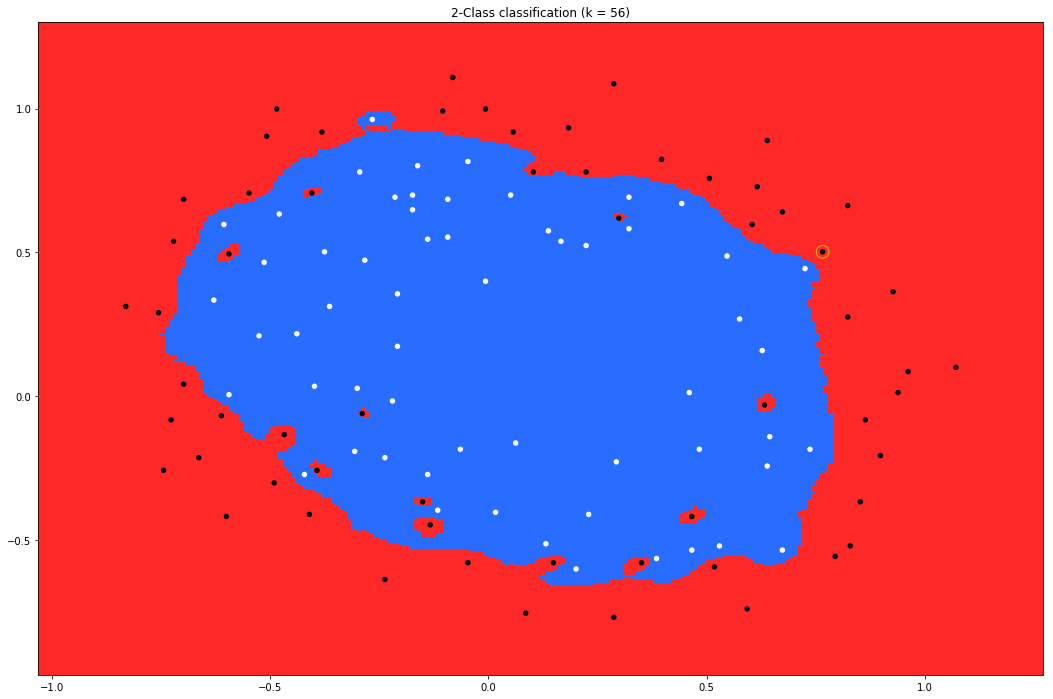

In [129]:
cmap_light = ListedColormap(['#ff2828', '#286dff'])
# cmap_bold = ListedColormap(['#a50000', '#0c00a5'])
cmap_bold = ListedColormap(['#000000', '#ffffff'])
plt.figure()
plt.rcParams["figure.figsize"] = list(map(lambda x: x * 1, plt.rcParams["figure.figsize"]))
plt.pcolormesh(xx, yy, result, cmap=cmap_light)
plt.scatter(points[:, 0], points[:, 1],  c = classes,cmap=cmap_bold,linewidths=0, s=30)

x = np.random.randn(60) 
y = np.random.randn(60)

plt.scatter( 0.76555,  0.50219, s=160, facecolors='none', edgecolors='y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (k))
plt.show()